In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the csv files

In [2]:
df_DZ = pd.read_csv('./Data/联创电子.csv')
df_MT = pd.read_csv('./Data/贵州茅台.csv')
df_ZC = pd.read_csv('./Data/涪陵榨菜.csv')

In [8]:
import qgrid
qgrid_wid = qgrid.show_grid(df_DZ)

In [9]:
qgrid_wid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [6]:
df_DZ.rename(columns={"收益率（红利）": "DZ_return"}, inplace=True)
df_DZ.head()

,交易日期,股票代码,月收盘价,DZ_return,收益率（无红利）,Unnamed: 5,Unnamed: 6
0,2013-01,2036.0,8.96,-0.002227,-0.002227,NaN,NaN
1,2013-02,2036.0,10.17,0.135045,0.135045,NaN,NaN
2,2013-03,2036.0,8.51,-0.163225,-0.163225,NaN,NaN
3,2013-04,2036.0,7.77,-0.086957,-0.086957,NaN,NaN
4,2013-05,2036.0,9.20,0.184041,0.184041,NaN,NaN


In [4]:
df_MT.rename(columns={"收益率（红利）": "MT_return"}, inplace=True)
df_MT.head()

,交易日期,股票代码,月收盘价,MT_return,收益率（无红利）,Unnamed: 5,Unnamed: 6
0,2013-01,600519,178.90,-0.144101,-0.144101,NaN,NaN
1,2013-02,600519,175.00,-0.021800,-0.021800,NaN,NaN
2,2013-03,600519,168.86,-0.035086,-0.035086,NaN,NaN
3,2013-04,600519,173.99,0.030380,0.030380,NaN,NaN
4,2013-05,600519,197.10,0.132824,0.132824,NaN,NaN


In [5]:
df_ZC.rename(columns={"收益率（红利）": "ZC_return"}, inplace=True)
df_ZC.head()

,交易日期,股票代码,月收盘价,ZC_return,收益率（无红利）,Unnamed: 5,Unnamed: 6
0,2013-01,2507.0,25.51,0.080017,0.080017,NaN,NaN
1,2013-02,2507.0,25.70,0.007448,0.007448,NaN,NaN
2,2013-03,2507.0,25.56,-0.005447,-0.005447,NaN,NaN
3,2013-04,2507.0,22.49,-0.120110,-0.120110,NaN,NaN
4,2013-05,2507.0,25.54,0.135616,0.135616,NaN,NaN


## Q(a): Calculate mean and variance-covariance matrix.

Mean:


Stock Name|Mean Return
---|---
FLZC|0.033364
LCDZ|0.020808
GZMT|0.028398


Covariance Matrix:


Stock Name|LCDZ|GZMT|FLZC|
---|---|---|---
LCDZ|0.03751847|  
GZMT|0.00182164|0.0077167|
FLZC|0.00754047|0.0023015|0.01302531

In [6]:
return_df = pd.concat([df_DZ["DZ_return"], df_MT["MT_return"], df_ZC["ZC_return"]], axis=1)

In [7]:
for column in list(return_df.columns[return_df.isnull().sum() > 0]):
    mean_val = return_df[column].mean()

In [8]:
return_df.head()

,DZ_return,MT_return,ZC_return
0,-0.002227,-0.144101,0.080017
1,0.135045,-0.021800,0.007448
2,-0.163225,-0.035086,-0.005447
3,-0.086957,0.030380,-0.120110
4,0.184041,0.132824,0.135616


In [9]:
return_df.describe().loc['mean']

DZ_return    0.020808
MT_return    0.028398
ZC_return    0.033364
Name: mean, dtype: float64

In [11]:
return_df = return_df.dropna()
np.cov(np.array(return_df).T)

array([[0.03751847, 0.00182164, 0.00754047],
       [0.00182164, 0.0077167 , 0.0023015 ],
       [0.00754047, 0.0023015 , 0.01302531]])

## Q(b): Effective frontier

Randomly generate different portfolios, and compute portfolios' mean and standard deviation:
$$ mean:\ (w_1 w_2 w_3)^T\cdot(\mu_1 \mu_2 \mu_3 ) $$


$$ standard\ deviation:\ (w_1 w_2 w_3)^T\cdot\Sigma\cdot(w_1 w_2 w_3)$$


$$ s.t.\ ||(w_1 w_2 w_3)||_1=1 $$

In [12]:
mean = return_df.describe().loc['mean'].values
std = np.array(np.cov(np.array(return_df).T))
portfolios = []
weights = []

density = 100000

for i in range(density):
    w1 = np.random.uniform(low=0,high=1)
    w2 = np.random.uniform(low=0,high=1-w1)
    w3 = 1-w1-w2
    weight = np.array([w1,w2,w3])
    p_mean = np.dot(weight, mean)
    p_std = np.dot(np.dot(weight, std), weight)
    p_std = p_std**0.5
    portfolios.append([p_mean, p_std])
portfolios = np.array(portfolios)

In [13]:
portfolio_df = pd.DataFrame(portfolios)
portfolio_df.columns=["mean", "std"]

In [14]:
portfolio_df.head()

,mean,std
0,0.026508,0.079557
1,0.026162,0.078459
2,0.027760,0.080776
3,0.024891,0.181582
4,0.025216,0.135857


Find the portfolio with minimum standard deviation, since we only draw the upper half of the efficient frontier

In [15]:
min_std = portfolio_df["std"].min()
min_mean = portfolio_df[portfolio_df["std"]==min_std]["mean"].min()
portfolio_df = portfolio_df[portfolio_df["mean"]>=min_mean]

### Draw the effective frontier

$$ a=1\cdot \Sigma^{-1}\cdot 1 $$
$$ b=1\cdot\Sigma^{-1}\cdot \mu$$
$$ c=\mu\cdot\Sigma^{-1}\cdot \mu$$
$$ \Delta=ac-bb$$
Effective frontier:
$$ \mu_p = \frac{a\sigma_p^2-2b\sigma_p+c}{\Delta}$$

In [16]:
std_I = np.linalg.inv(std)
a = np.dot(np.ones(3), np.dot(std_I,np.ones(3)))
b = np.dot(np.ones(3), np.dot(std_I,mean))
c = np.dot(mean, np.dot(std_I,mean))

Delta = a*c-b*b

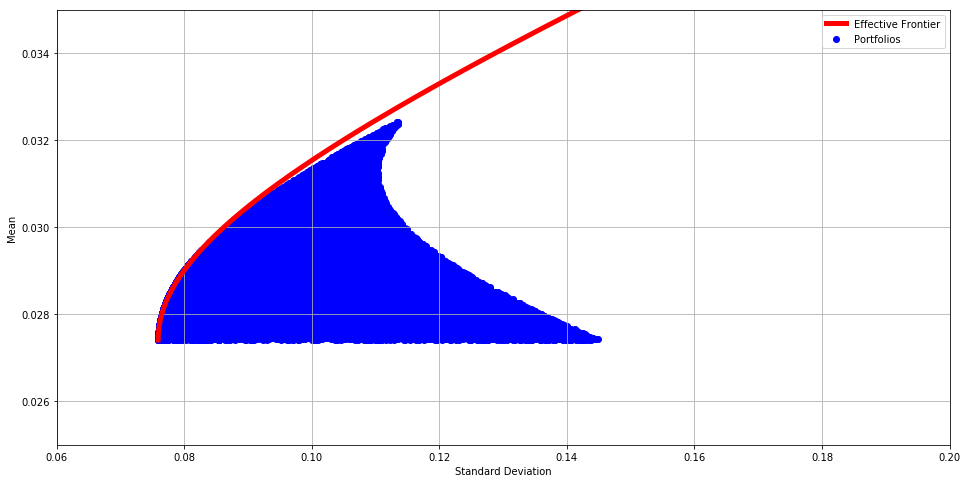

In [17]:
fig = plt.figure(figsize=(16,8))

plt.xlim(xmin=0.06, xmax = 0.2)
plt.ylim(ymin=0.025,ymax=0.035)
plt.grid(True)
plt.scatter(x=portfolio_df["std"], y=portfolio_df["mean"], color='b', linewidths=1, label="Portfolios")

y2 = np.arange(min_mean,0.1,0.0001)
x2 = ((a*y2**2-2*b*y2+c)/Delta)**0.5
plt.plot(x2,y2, color='r', label="Effective Frontier", lw=5)

plt.plot()
plt.xlabel("Standard Deviation")
plt.ylabel("Mean")
plt.legend(loc=1)
plt.savefig('Q1.1(b).png')

## Q(c): Find the portfolio with the minimum standard deviation

$$ \pi_g=\frac{\Sigma^{-1}\cdot 1}{a}$$

The weight for the portfolio with minimum standard deviation is:
$$ \pi_g = (0.06367325, 0.64471892, 0.29160782)$$

Stock Name|LCDZ|GZMT|FLZC
--|--|--|--
Weight|0.06367325|0.64471892|0.29160782

In [18]:
min_weight = np.dot(np.linalg.inv(std), np.ones(3))/a

In [19]:
min_weight

array([0.06367325, 0.64471892, 0.29160782])

In [20]:
np.dot(min_weight, mean)

0.027413546463446695

In [21]:
(np.dot(min_weight, np.dot(std, min_weight)))**0.5

0.07590935949501681

## Q(d): Build an efficient frontier with the risk-free asset

If we introduce a risk-free asset, then the effective frontier should be:
$$ \mu_p = r_f+\sigma_p \sqrt{c-2r_fb+r_f^2a}$$

In [22]:
rf = 0.002

In [23]:
slope = (c-2*rf*b+rf*rf*a)**0.5

In [24]:
## get market portfolio's slope
greatest_slope = 0
market_portfolio = None

for portfolio in portfolios:
    slope = (portfolio[0]-rf)/portfolio[1]
    if slope > greatest_slope:
        greatest_slope = slope
        market_portfolio = portfolio

In [25]:
greatest_slope

0.3407360079873532

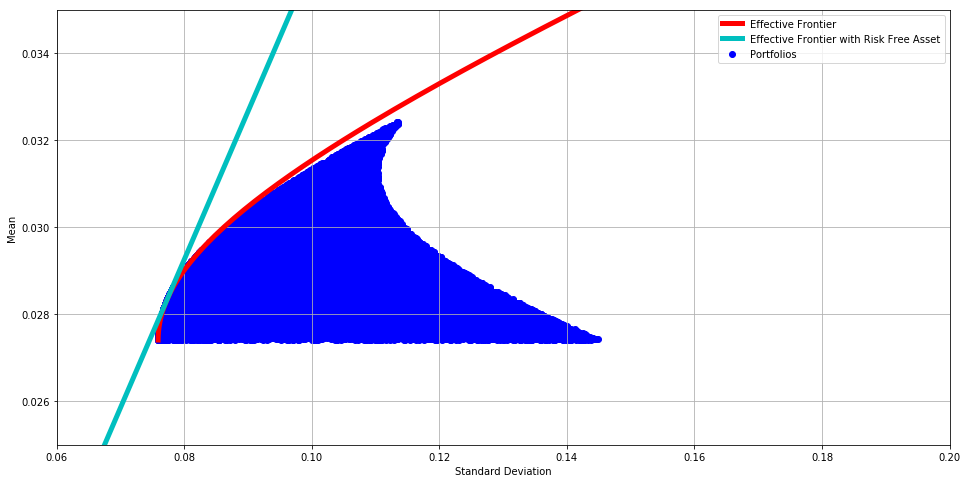

In [27]:
fig = plt.figure(figsize=(16,8))

plt.xlim(xmin=0.06, xmax = 0.2)
plt.ylim(ymin=0.025,ymax=0.035)
plt.grid(True)
plt.scatter(x=portfolio_df["std"], y=portfolio_df["mean"], color='b', linewidths=1, label="Portfolios")

y2 = np.arange(min_mean,0.1,0.0001)
x2 = ((a*(y2**2)-2*b*y2+c)/Delta)**0.5
plt.plot(x2,y2, color='r', label="Effective Frontier", lw=5)

x3 = np.arange(0,1, 0.001)
y3 = x3*greatest_slope+0.002
plt.plot(x3,y3, color='c', label="Effective Frontier with Risk Free Asset", lw=5)

# y4 = x3*slope2+0.002
# plt.plot(x3,y4, color='c', label="Effective Frontier with Risk Free Asset", lw=5)

plt.plot()
plt.xlabel("Standard Deviation")
plt.ylabel("Mean")
plt.legend(loc=1)
plt.savefig('Q1.1(d).png')

## Q(e): Find the market portfolio

$$ Sharp\ Ratio = \frac{\mu_m-rf}{\sigma_m}$$
The sharp ratio is 0.34073

The market portfolio's weights are:

Stock Name|LCDZ|GZMT|FLZC
--|--|--|--
Weight|0.02793284|0.55968293|0.41238423

In [28]:
sharp_ratio = (market_portfolio[0]-rf)/market_portfolio[1]

In [29]:
sharp_ratio

0.3407360079873532

Compute gamma and theta
$$ \gamma = \frac{c-b\mu_p}{\Delta}$$
$$ \theta = \frac{a\mu_p-b}{\Delta}$$

In [30]:
gamma = (c-b*market_portfolio[0])/Delta
theta = (a*market_portfolio[0]-b)/Delta

In [31]:
market_weight = np.dot(theta, np.dot(std_I, mean))+np.dot(gamma, np.dot(std_I, np.ones(3)))

In [32]:
market_weight

array([0.02630609, 0.55581245, 0.41788146])